<a href="https://colab.research.google.com/github/gbiamgaurav/Time-Series-Tutorials/blob/main/ARIMA_%26_SARIMAX_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

In [2]:
url = "https://raw.githubusercontent.com/facebook/prophet/main/examples/example_air_passengers.csv"

In [3]:
df = pd.read_csv(url, header=0, parse_dates=[0], index_col=0)

In [4]:
df.head()

,y
ds,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
train_data = df.iloc[:-12]

test_data = df.iloc[-12:]

In [6]:
train_data

,y
ds,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1959-08-01,559
1959-09-01,463
1959-10-01,407


In [7]:
test_data

,y
ds,
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535
1960-07-01,622
1960-08-01,606
1960-09-01,508


## ARIMA Model

In [8]:
arima_model = ARIMA(train_data, order=(5,1,0))

arima_result = arima_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


## Now we forecasts the next 12 months of airline passenger

In [9]:
arima_forecast = arima_result.forecast(steps=12)

arima_forecast

1960-01-01    458.449443
1960-02-01    479.570530
1960-03-01    480.136849
1960-04-01    456.665330
1960-05-01    435.835311
1960-06-01    431.734530
1960-07-01    437.928972
1960-08-01    448.935482
1960-09-01    455.562128
1960-10-01    454.628436
1960-11-01    450.095386
1960-12-01    445.706019
Freq: MS, Name: predicted_mean, dtype: float64

## SARIMA Model

In [10]:
sarima_model = SARIMAX(train_data, order=(1,1,1), seasonal_order=(1,1,1,12))

sarima_result = sarima_model.fit()

sarima_forecast = sarima_result.forecast(steps=12)

sarima_forecast

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1960-01-01    421.884535
1960-02-01    405.452635
1960-03-01    464.729008
1960-04-01    453.508395
1960-05-01    477.307314
1960-06-01    534.869160
1960-07-01    609.501292
1960-08-01    621.629885
1960-09-01    522.670254
1960-10-01    467.991532
1960-11-01    423.840208
1960-12-01    466.231304
Freq: MS, Name: predicted_mean, dtype: float64

## Compare the 2 Models ARIMA, SARIMA

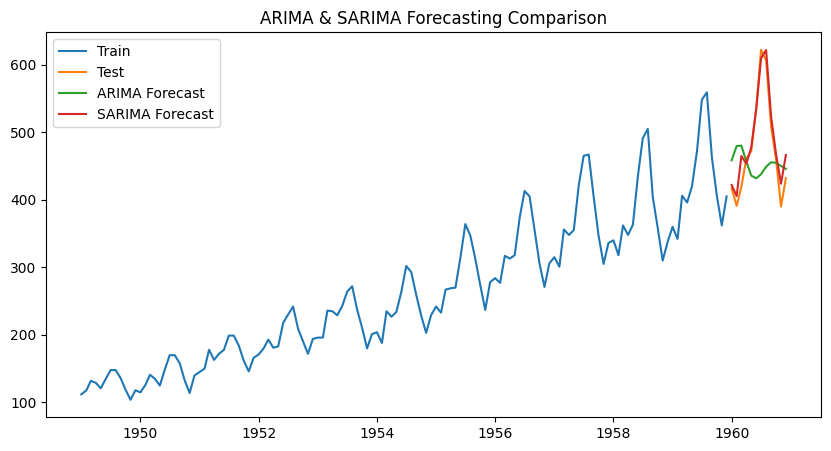

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(arima_forecast, label='ARIMA Forecast')
plt.plot(sarima_forecast, label='SARIMA Forecast')
plt.legend()
plt.title('ARIMA & SARIMA Forecasting Comparison')
plt.show();

## Let’s now calculate MAE and RMSE metrics to determine both statistical models

In [12]:
## MAE

arima_mae = mean_absolute_error(test_data, arima_forecast)
sarima_mae = mean_absolute_error(test_data, sarima_forecast)

## RMSE

arima_rmse = np.sqrt(mean_squared_error(test_data, arima_forecast))
sarima_rmse = np.sqrt(mean_squared_error(test_data, sarima_forecast))

print(f"ARIMA MAE: {arima_mae:.2f}, SARIMA MAE: {sarima_mae:.2f}")
print("---------------------------------------------------------")
print(f"ARIMA RMSE: {arima_rmse:.2f}, SARIMA RMSE: {sarima_rmse:.2f}")

ARIMA MAE: 67.39, SARIMA MAE: 16.32
---------------------------------------------------------
ARIMA RMSE: 86.81, SARIMA RMSE: 21.19


## Machine Learning Models

In [24]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

### install skforecast

read here: https://skforecast.org/0.12.0/index.html

In [14]:
!pip install -U skforecast -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 558.3/558.3 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 5.2 MB/s eta 0:00:00


In [15]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"

In [16]:
df = pd.read_csv(url, parse_dates=True, header=0, index_col=0)

df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [17]:
df = df.squeeze("columns")  ## Convert into a series

df.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: Passengers, dtype: int64

In [18]:
train_data = df.iloc[:-12]

test_data = df.iloc[-12:]

In [20]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.linear_model import Lasso

In [25]:
## Model 1: Linear Regression Model

forecast_lr = ForecasterAutoreg(regressor=Lasso(random_state=10), lags=12)
forecast_lr.fit(y=train_data)
predictions_lr = forecast_lr.predict(steps=12)

## Model 2: Random Forest

forecast_rf = ForecasterAutoreg(regressor=RandomForestRegressor(n_estimators=100, random_state=10), lags=12)
forecast_rf.fit(y=train_data)
predictions_rf = forecast_rf.predict(steps=12)


## Model 3: SVR

forecast_svr = ForecasterAutoreg(regressor=SVR(kernel='linear'), lags=12)
forecast_svr.fit(y=train_data)
predictions_svr = forecast_svr.predict(steps=12)

## Compare the Model Performance

In [28]:
lr_error_rmse = mean_squared_error(
    y_true = test_data.head(12),
    y_pred = predictions_lr,
    squared = False
)

print(f"Lasso RMSE: {lr_error_rmse:.2f}")

rf_error_rmse = mean_squared_error(
    y_true = test_data.head(12),
    y_pred = predictions_rf,
    squared = False
)

print(f"Random Forest RMSE: {rf_error_rmse:.2f}")

svr_error_rmse = mean_squared_error(
    y_true = test_data.head(12),
    y_pred = predictions_svr,
    squared = False
)

print(f"SVR RMSE: {svr_error_rmse:.2f}")

Lasso RMSE: 17.44
Random Forest RMSE: 37.78
SVR RMSE: 18.45


### In this case, Lasso returned the bests forecasts.

## LightGBM

Gradient Boosting Models (GBM) have also gained popularity in forecasting due to their ability to capture non-linear information and exogenous variables.

In [29]:
import numpy as np
import pandas as pd
from skforecast.datasets import fetch_dataset
from lightgbm import LGBMRegressor
from skforecast.model_selection import backtesting_forecaster
from skforecast.ForecasterAutoreg import ForecasterAutoreg

In [30]:
df = fetch_dataset('bike_sharing', raw=True)

df.head()

bike_sharing
------------
Hourly usage of the bike share system in the city of Washington D.C. during the
years 2011 and 2012. In addition to the number of users per hour, information
about weather conditions and holidays is available.
Fanaee-T,Hadi. (2013). Bike Sharing Dataset. UCI Machine Learning Repository.
https://doi.org/10.24432/C5W894.
Shape of the dataset: (17544, 12)


,date_time,holiday,workingday,weather,temp,atemp,hum,windspeed,users,month,hour,weekday
0,2011-01-01 00:00:00,0.0,0.0,clear,9.84,14.395,81.0,0.0,16.0,1,0,5
1,2011-01-01 01:00:00,0.0,0.0,clear,9.02,13.635,80.0,0.0,40.0,1,1,5
2,2011-01-01 02:00:00,0.0,0.0,clear,9.02,13.635,80.0,0.0,32.0,1,2,5
3,2011-01-01 03:00:00,0.0,0.0,clear,9.84,14.395,75.0,0.0,13.0,1,3,5
4,2011-01-01 04:00:00,0.0,0.0,clear,9.84,14.395,75.0,0.0,1.0,1,4,5


In [31]:
df = df[['date_time', 'users']]

df.head()

,date_time,users
0,2011-01-01 00:00:00,16.0
1,2011-01-01 01:00:00,40.0
2,2011-01-01 02:00:00,32.0
3,2011-01-01 03:00:00,13.0
4,2011-01-01 04:00:00,1.0


In [32]:
df['date_time'] = pd.to_datetime(df['date_time'], format='%Y-%m-%d %H:%M:%S')

df = df.set_index('date_time')

df.head()

,users
date_time,
2011-01-01 00:00:00,16.0
2011-01-01 01:00:00,40.0
2011-01-01 02:00:00,32.0
2011-01-01 03:00:00,13.0
2011-01-01 04:00:00,1.0


In [33]:
df = df.asfreq('H')

df = df.sort_index()

In [34]:
df.head()

,users
date_time,
2011-01-01 00:00:00,16.0
2011-01-01 01:00:00,40.0
2011-01-01 02:00:00,32.0
2011-01-01 03:00:00,13.0
2011-01-01 04:00:00,1.0


In [35]:
df.columns

Index(['users'], dtype='object')

In [36]:
end_train = '2012-03-31 23:59:00'
end_validation = '2012-08-31 23:59:00'

train_data = df.loc[: end_train, :]
val_data = df.loc[end_train:end_validation, :]
test_data = df.loc[end_validation:, :]

In [37]:
forecaster = ForecasterAutoreg(
    regressor = LGBMRegressor(random_state=10, verbose=-1),
    lags = 24
)

In [38]:
metric, predictions = backtesting_forecaster(
    forecaster = forecaster,
    y = df['users'],
    steps = 36,
    metric = 'mean_absolute_error',
    initial_train_size = len(df[:end_validation]),
    refit = False,
    n_jobs = 'auto',
    verbose = True,
    show_progress = True
)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 14616
Number of observations used for backtesting: 2928
    Number of folds: 82
    Number of steps per fold: 36
    Number of steps to exclude from the end of each train set before test (gap): 0
    Last fold only includes 12 observations.

Fold: 0
    Training:   2011-01-01 00:00:00 -- 2012-08-31 23:00:00  (n=14616)
    Validation: 2012-09-01 00:00:00 -- 2012-09-02 11:00:00  (n=36)
Fold: 1
    Training:   2011-01-01 00:00:00 -- 2012-08-31 23:00:00  (n=14616)
    Validation: 2012-09-02 12:00:00 -- 2012-09-03 23:00:00  (n=36)
Fold: 2
    Training:   2011-01-01 00:00:00 -- 2012-08-31 23:00:00  (n=14616)
    Validation: 2012-09-04 00:00:00 -- 2012-09-05 11:00:00  (n=36)
Fold: 3
    Training:   2011-01-01 00:00:00 -- 2012-08-31 23:00:00  (n=14616)
    Validation: 2012-09-05 12:00:00 -- 2012-09-06 23:00:00  (n=36)
Fold: 4
    Training:   2011-01-01 00:00:00 -- 2012-08-31 

  0%|          | 0/82 [00:00<?, ?it/s]

In [40]:
## Evaluation

print(f'Backtest error (MAE): {metric:.2f}')

Backtest error (MAE): 76.26


## Using LSTM - Deep Learning

In [41]:
from math import sqrt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from skforecast.datasets import fetch_dataset

In [49]:
data = fetch_dataset('bike_sharing', raw=True)
dataset = data['users'].values.reshape(-1, 1)

# scale down the values between 0 and 1

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

bike_sharing
------------
Hourly usage of the bike share system in the city of Washington D.C. during the
years 2011 and 2012. In addition to the number of users per hour, information
about weather conditions and holidays is available.
Fanaee-T,Hadi. (2013). Bike Sharing Dataset. UCI Machine Learning Repository.
https://doi.org/10.24432/C5W894.
Shape of the dataset: (17544, 12)


In [50]:
# train-test split

train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

## Now we train an LSTM and evaluate its performance:

In [52]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)
look_back = 1

In [53]:
# separate the ylabel

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=3, batch_size=1, verbose=2)

Epoch 1/3
11752/11752 - 18s - loss: 0.0077 - 18s/epoch - 2ms/step
Epoch 2/3
11752/11752 - 21s - loss: 0.0066 - 21s/epoch - 2ms/step
Epoch 3/3
11752/11752 - 16s - loss: 0.0066 - 16s/epoch - 1ms/step


In [56]:
# get the final rmse after prediction

testPredict = model.predict(testX)
testScore = sqrt(mean_squared_error(testY, testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

181/181 [==============================] - 1s 5ms/step
Test Score: 0.12 RMSE
